# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

def getSignNames():
    return pd.read_csv('signnames.csv').values

def plotSigns(X, y, examples_per_sign=5, squeeze=False, cmap=None):
    samples_per_sign = np.bincount(y)
    for sign in getSignNames():
        print("{0}. {1} - Random Samples: {2}".format(sign[0], sign[1], samples_per_sign[sign[0]]))
        sign_indices = np.where(y==sign[0])[0]
        random_samples = random.sample(list(sign_indices), examples_per_sign)
        fig = plt.figure(figsize = (examples_per_sign, 1))
        fig.subplots_adjust(hspace = 0, wspace = 0)
        for i in range(examples_per_sign):
            image = X[random_samples[i]]
            axis = fig.add_subplot(1,examples_per_sign, i+1, xticks=[], yticks=[])
            if squeeze: image = image.squeeze()
            if cmap == None: axis.imshow(image)
            else: axis.imshow(image.squeeze(), cmap=cmap)
        plt.show()

0. Speed limit (20km/h) - Random Samples: 180


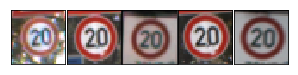

1. Speed limit (30km/h) - Random Samples: 1980


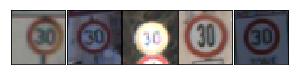

2. Speed limit (50km/h) - Random Samples: 2010


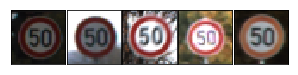

3. Speed limit (60km/h) - Random Samples: 1260


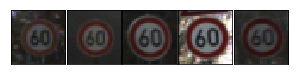

4. Speed limit (70km/h) - Random Samples: 1770


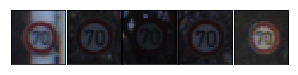

5. Speed limit (80km/h) - Random Samples: 1650


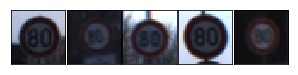

6. End of speed limit (80km/h) - Random Samples: 360


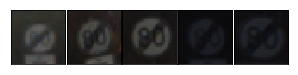

7. Speed limit (100km/h) - Random Samples: 1290


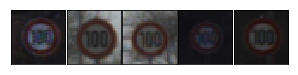

8. Speed limit (120km/h) - Random Samples: 1260


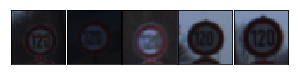

9. No passing - Random Samples: 1320


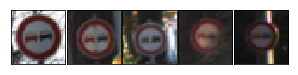

10. No passing for vehicles over 3.5 metric tons - Random Samples: 1800


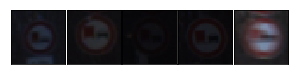

11. Right-of-way at the next intersection - Random Samples: 1170


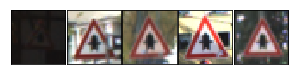

12. Priority road - Random Samples: 1890


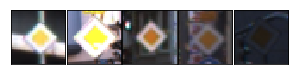

13. Yield - Random Samples: 1920


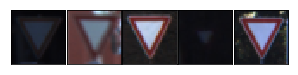

14. Stop - Random Samples: 690


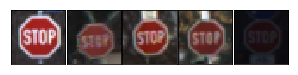

15. No vehicles - Random Samples: 540


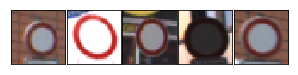

16. Vehicles over 3.5 metric tons prohibited - Random Samples: 360


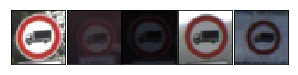

17. No entry - Random Samples: 990


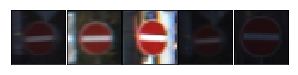

18. General caution - Random Samples: 1080


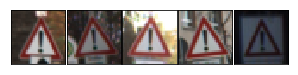

19. Dangerous curve to the left - Random Samples: 180


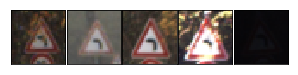

20. Dangerous curve to the right - Random Samples: 300


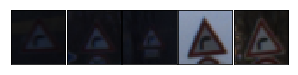

21. Double curve - Random Samples: 270


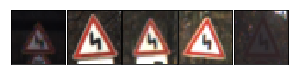

22. Bumpy road - Random Samples: 330


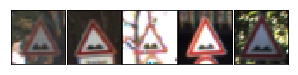

23. Slippery road - Random Samples: 450


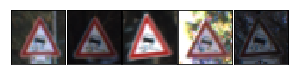

24. Road narrows on the right - Random Samples: 240


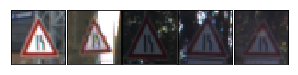

25. Road work - Random Samples: 1350


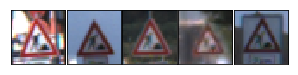

26. Traffic signals - Random Samples: 540


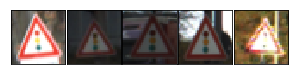

27. Pedestrians - Random Samples: 210


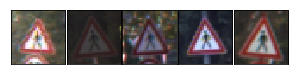

28. Children crossing - Random Samples: 480


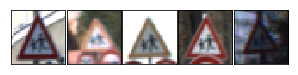

29. Bicycles crossing - Random Samples: 240


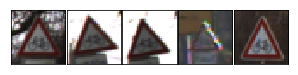

30. Beware of ice/snow - Random Samples: 390


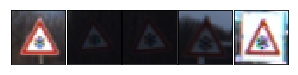

31. Wild animals crossing - Random Samples: 690


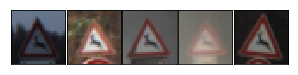

32. End of all speed and passing limits - Random Samples: 210


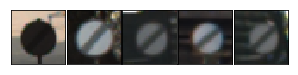

33. Turn right ahead - Random Samples: 599


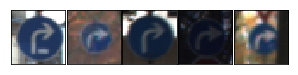

34. Turn left ahead - Random Samples: 360


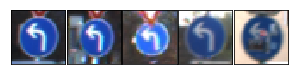

35. Ahead only - Random Samples: 1080


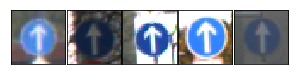

36. Go straight or right - Random Samples: 330


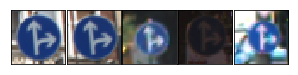

37. Go straight or left - Random Samples: 180


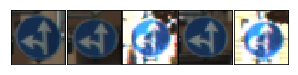

38. Keep right - Random Samples: 1860


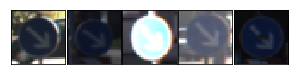

39. Keep left - Random Samples: 270


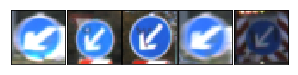

40. Roundabout mandatory - Random Samples: 300


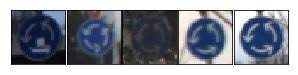

41. End of no passing - Random Samples: 210


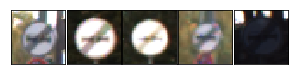

42. End of no passing by vehicles over 3.5 metric tons - Random Samples: 210


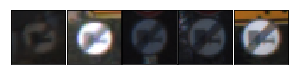

In [4]:
plotSigns(X_train, y_train)

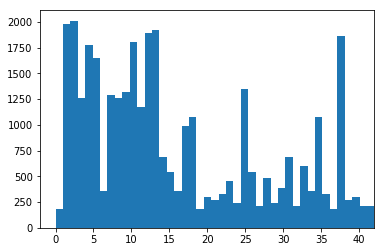

In [5]:
# plot the histogram
plt.hist(y_train, bins = n_classes)
plt.xlim(xmax=n_classes-1)
plt.show()

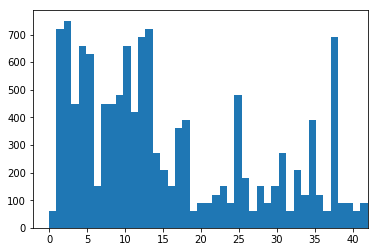

In [6]:
# plot the histogram
plt.hist(y_test, bins = n_classes)
plt.xlim(xmax=n_classes-1)
plt.show()

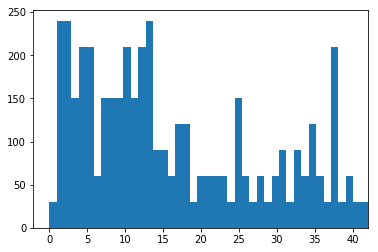

In [7]:
# plot the histogram
plt.hist(y_valid, bins = n_classes)
plt.xlim(xmax=n_classes-1)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

def hist_eq(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)


def getGrayScale(img):
    img_YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    return np.resize(img_YCrCb[:,:,0], (32,32,1))

def normalizeImage(img):
    a = 0.1
    b = 0.9
    minimum = 0
    maximum = 255
    return a + ((img - minimum) * (b - a)) / (maximum - minimum)

def preprocessImages(images):
    prcessed_array = []
    for img in images:
        processed_array.append(normalizeImage(getGrayScale(hist_eq(img))))
    return ret_array

X_train = preprocessImages(X_train)
X_valid = preprocessImages(X_valid)
X_test = preprocessImages(X_test)


0. Speed limit (20km/h) - Random Samples: 180


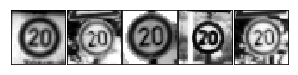

1. Speed limit (30km/h) - Random Samples: 1980


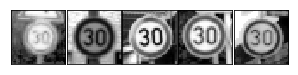

2. Speed limit (50km/h) - Random Samples: 2010


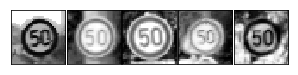

3. Speed limit (60km/h) - Random Samples: 1260


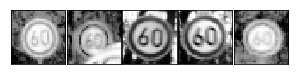

4. Speed limit (70km/h) - Random Samples: 1770


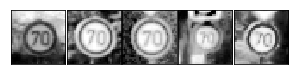

5. Speed limit (80km/h) - Random Samples: 1650


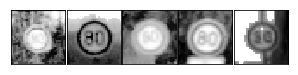

6. End of speed limit (80km/h) - Random Samples: 360


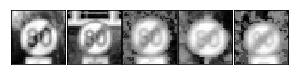

7. Speed limit (100km/h) - Random Samples: 1290


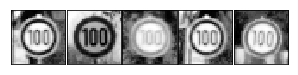

8. Speed limit (120km/h) - Random Samples: 1260


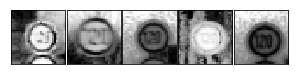

9. No passing - Random Samples: 1320


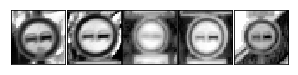

10. No passing for vehicles over 3.5 metric tons - Random Samples: 1800


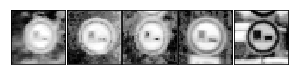

11. Right-of-way at the next intersection - Random Samples: 1170


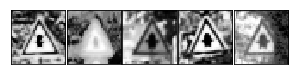

12. Priority road - Random Samples: 1890


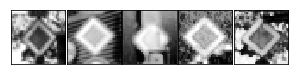

13. Yield - Random Samples: 1920


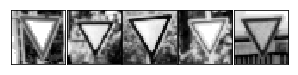

14. Stop - Random Samples: 690


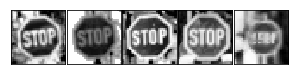

15. No vehicles - Random Samples: 540


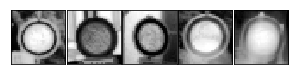

16. Vehicles over 3.5 metric tons prohibited - Random Samples: 360


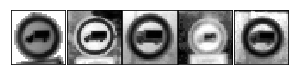

17. No entry - Random Samples: 990


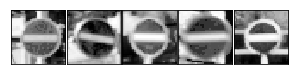

18. General caution - Random Samples: 1080


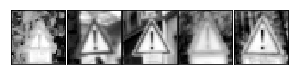

19. Dangerous curve to the left - Random Samples: 180


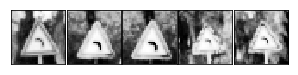

20. Dangerous curve to the right - Random Samples: 300


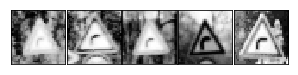

21. Double curve - Random Samples: 270


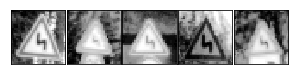

22. Bumpy road - Random Samples: 330


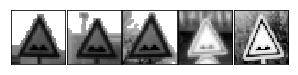

23. Slippery road - Random Samples: 450


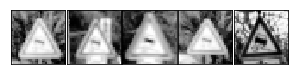

24. Road narrows on the right - Random Samples: 240


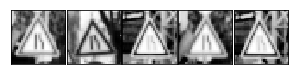

25. Road work - Random Samples: 1350


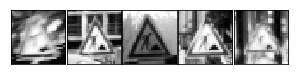

26. Traffic signals - Random Samples: 540


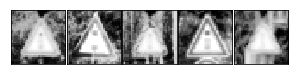

27. Pedestrians - Random Samples: 210


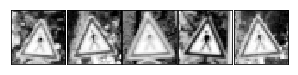

28. Children crossing - Random Samples: 480


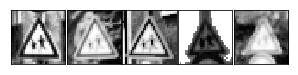

29. Bicycles crossing - Random Samples: 240


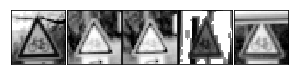

30. Beware of ice/snow - Random Samples: 390


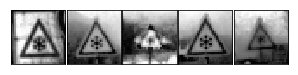

31. Wild animals crossing - Random Samples: 690


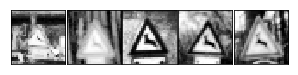

32. End of all speed and passing limits - Random Samples: 210


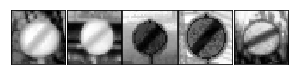

33. Turn right ahead - Random Samples: 599


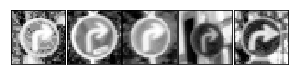

34. Turn left ahead - Random Samples: 360


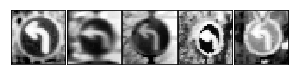

35. Ahead only - Random Samples: 1080


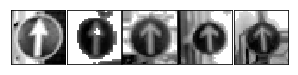

36. Go straight or right - Random Samples: 330


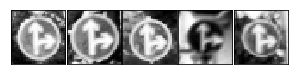

37. Go straight or left - Random Samples: 180


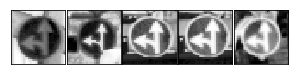

38. Keep right - Random Samples: 1860


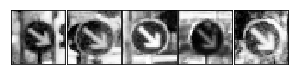

39. Keep left - Random Samples: 270


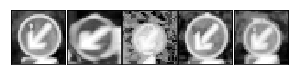

40. Roundabout mandatory - Random Samples: 300


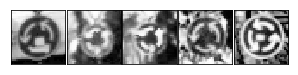

41. End of no passing - Random Samples: 210


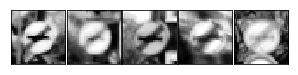

42. End of no passing by vehicles over 3.5 metric tons - Random Samples: 210


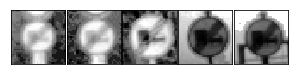

In [30]:
plotSigns(X_train, y_train, squeeze=True, cmap='gray')

In [5]:
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import os
import tensorflow as tf
from tensorflow.contrib.layers import flatten


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Advanced Architecture

In [14]:
import os
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet_Adv(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    keep_prob=0.5
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(16))
    x = tf.nn.bias_add(x, b1)
    
    # Activation.
    x = tf.nn.relu(x)
    
    # Pooling. Input = 28x28x16. Output = 14x14x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # Layer 2: Convolutional. Output = 10x10x32.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(32))
    x = tf.nn.bias_add(x, b2)
                     
    # Activation.
    x = tf.nn.relu(x)

    # Pooling. Input = 10x10x32. Output = 5x5x32.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # Layer 3: Convolutional. Output = 1x1x800.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 800), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(900))
    x = tf.nn.bias_add(x, b3)
                     
    # Activation.
    
    layer3 = x

    # Flatten. Input = 5x5x32. Output = 800.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x800. Output = 800.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 800 + 800. Output = 1600
    x = tf.concat_v2([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 4: Fully Connected. Input = 1600. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(1600, 43), mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros(43))    
    logits = tf.add(tf.matmul(x, W4), b4)
     
    return logits

print('ok')

ok


## Features and Labels

In [15]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
rate = 0.00097

logits = LeNet_Adv(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer2flat shape: (?, 800)
xflat shape: (?, 800)
x shape: (?, 1600)


In [17]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

EPOCHS = 25
BATCH_SIZE = 156

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    for i in range(EPOCHS):
        print("EPOCH {} ... ".format(i+1), end='')
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...
EPOCH 1 ... Validation Accuracy = 0.834
EPOCH 2 ... Validation Accuracy = 0.881
EPOCH 3 ... Validation Accuracy = 0.911
EPOCH 4 ... Validation Accuracy = 0.922
EPOCH 5 ... Validation Accuracy = 0.921
EPOCH 6 ... Validation Accuracy = 0.922
EPOCH 7 ... Validation Accuracy = 0.937
EPOCH 8 ... Validation Accuracy = 0.939
EPOCH 9 ... Validation Accuracy = 0.941
EPOCH 10 ... Validation Accuracy = 0.936
EPOCH 11 ... Validation Accuracy = 0.936
EPOCH 12 ... Validation Accuracy = 0.935
EPOCH 13 ... Validation Accuracy = 0.924
EPOCH 14 ... Validation Accuracy = 0.933
EPOCH 15 ... Validation Accuracy = 0.941
EPOCH 16 ... Validation Accuracy = 0.936
EPOCH 17 ... Validation Accuracy = 0.940
EPOCH 18 ... Validation Accuracy = 0.939
EPOCH 19 ... Validation Accuracy = 0.950
EPOCH 20 ... Validation Accuracy = 0.941
EPOCH 21 ... Validation Accuracy = 0.941
EPOCH 22 ... Validation Accuracy = 0.937
EPOCH 23 ... Validation Accuracy = 0.950
EPOCH 24 ... Validation Accuracy = 0.953
EPOCH 25 ... 

In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.942


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

web_signs/09_no_passing.JPG
web_signs/14_stop2.JPG
web_signs/18_attention.JPG
web_signs/14_stop.JPG
web_signs/18_attention2.JPG
web_signs/13_yield.JPG
web_signs/05_80.JPG
web_signs/17_noentry.JPG


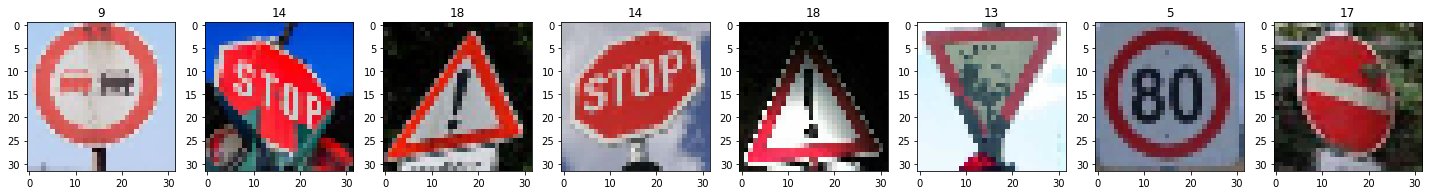

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob

signs_from_web = []
labels = []

img_files = glob.glob('web_signs/*.JPG')


def getSignNames():
    for file in img_files:
        print(file)
        # get label from file, first 2 digits of filename
        label = int(file.split('/')[-1][:2])
        labels.append(label)
        img =  cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(img, (32, 32)) 
        signs_from_web.append(resized_image)


def draw_images(data, labels, squeeze=False, cmap=None):
    fig = plt.figure(figsize = (25,5))
    for i in range(0, len(data)):
        axis = fig.add_subplot(1, len(data), i + 1)
        axis.set_title(labels[i])
        image = data[i]
        if squeeze: image = image.squeeze()
        if cmap == None: axis.imshow(image)
        else: axis.imshow(image.squeeze(), cmap=cmap)
    plt.show()
        

sign_names = getSignNames()        
draw_images(signs_from_web, labels)

### Predict the Sign Type for Each Image

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

signs_from_web_proccessed = preprocessImages(signs_from_web)

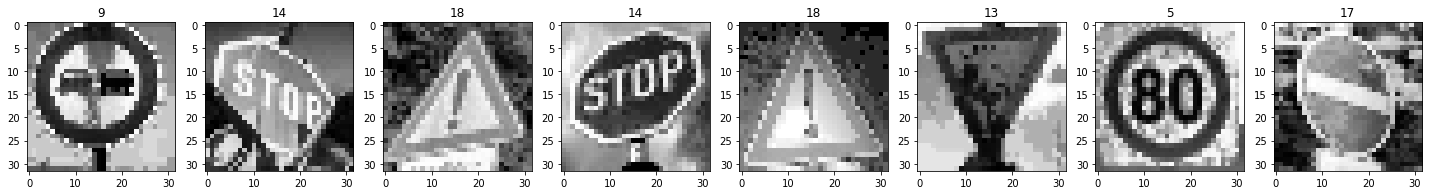

In [21]:
draw_images(signs_from_web_proccessed, labels, squeeze=True, cmap='gray')

### Analyze Performance

In [22]:
### Calculate the accuracy for these 8 new images. 
### For example, if the model predicted 1 out of 8 signs correctly, it's 12% accurate on these new images.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
BATCH_SIZE = 128

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(signs_from_web_proccessed, labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.500


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

[14 17  4 38 12]
[35 14 12 34 13]
[18 27 25 11  2]
[32  1 13  6 17]
[18 40 37 21 26]
[13 12 17 11 41]
[6 2 5 1 3]
[17 34 13 38 29]


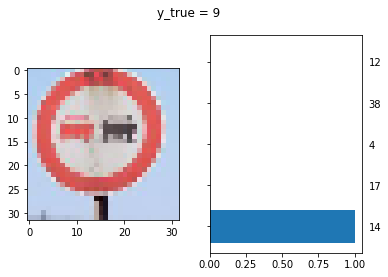

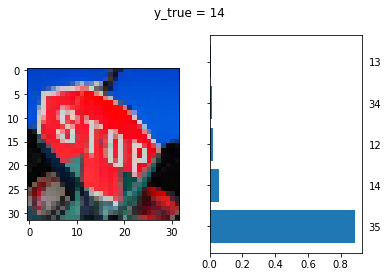

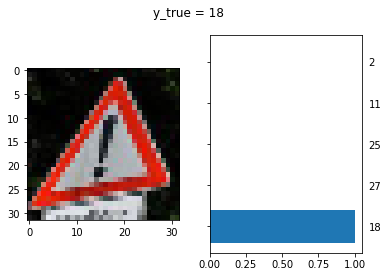

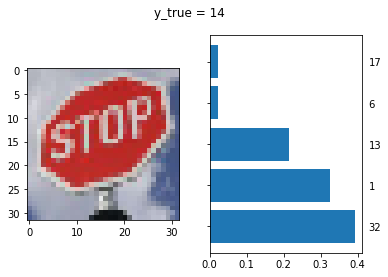

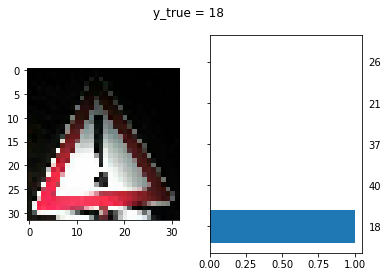

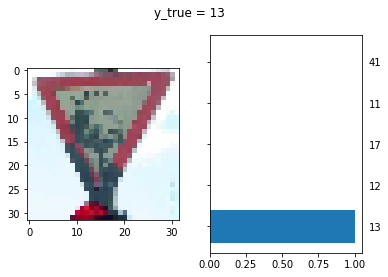

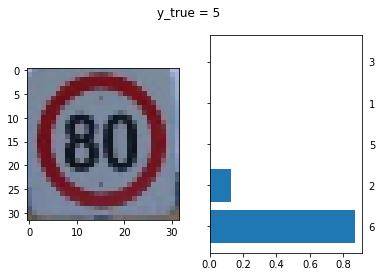

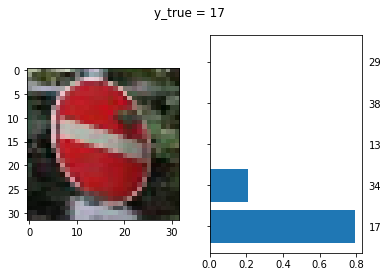

In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
TOP_K = 5

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=TOP_K), feed_dict={x:signs_from_web_proccessed})

for i in range(len(img_files)):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False)
    f.suptitle("y_true = {}".format(labels[i]))
    ax1.imshow(signs_from_web[i])
    ax2.barh(range(TOP_K), top.values[i], align='center')
    ax2.set_yticks(range(TOP_K))
    print(top[1][i].astype(int))
    ax2.set_yticklabels( top[1][i].astype(int))
    ax2.tick_params(labelleft='off' , labelright='on')